In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
df1=pd.read_csv("/kaggle/input/mitron-bank-transactions-dataset/dim_customers.csv")
df2=pd.read_csv("/kaggle/input/mitron-bank-transactions-dataset/fact_spends.csv")

# Data Cleaning

In [3]:
df1.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [4]:
df2.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [5]:
df = pd.merge(df1, df2, on='customer_id', how='inner')

In [6]:
df.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


In [7]:
df.shape

(864000, 11)

In [8]:
df.isna().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
month             0
category          0
payment_type      0
spend             0
dtype: int64

In [9]:
df.dtypes

customer_id       object
age_group         object
city              object
occupation        object
gender            object
marital status    object
avg_income         int64
month             object
category          object
payment_type      object
spend              int64
dtype: object

# EDA

### Average spending based on gender

In [10]:

result_1=df.groupby(by=["gender","marital status"])["spend"].mean()
result_1=result_1.reset_index()
result_1

,gender,marital status,spend
0,Female,Married,590.224423
1,Female,Single,501.678631
2,Male,Married,657.876539
3,Male,Single,565.600937


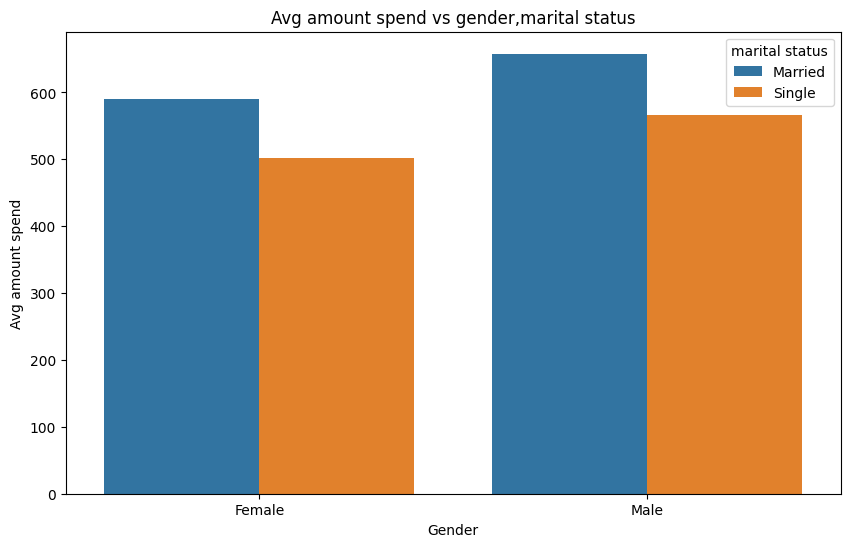

In [11]:
sns.barplot(x=result_1["gender"],y=result_1["spend"],hue=result_1["marital status"])
plt.ylabel("Avg amount spend")
plt.xlabel("Gender")
plt.title("Avg amount spend vs gender,marital status")
plt.show()

### Occupation vs average spending

In [12]:

result_3=df.groupby("occupation")["spend"].mean().sort_values(ascending=False)

result_3

occupation
Salaried IT Employees       871.974297
Business Owners             646.713029
Salaried Other Employees    453.691707
Freelancers                 446.066220
Government Employees        419.131370
Name: spend, dtype: float64

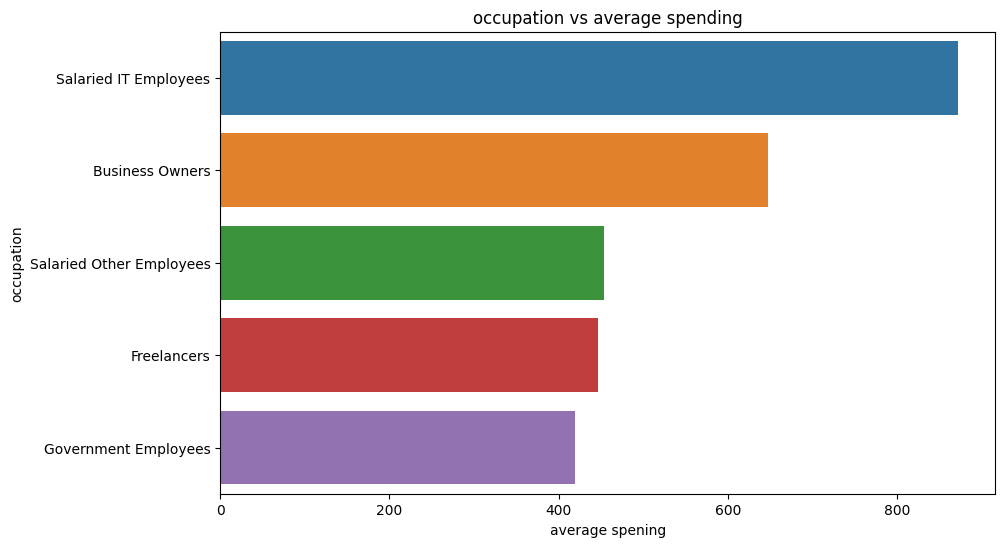

In [13]:
sns.barplot(x=result_3.values,y=result_3.index)
plt.xlabel("average spening")
plt.ylabel("occupation")
plt.title("occupation vs average spending")
plt.show()

### Where do people spend their money the most

In [14]:

result_4=df.groupby("category")["spend"].sum().sort_values(ascending=False)
result_4

category
Bills                104912768
Groceries             86303761
Electronics           79562220
Health & Wellness     65599867
Travel                59223324
Food                  44013470
Entertainment         41289162
Apparel               34036001
Others                15957182
Name: spend, dtype: int64

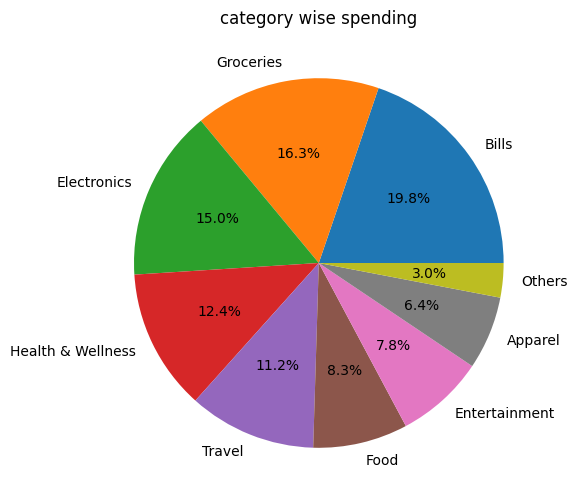

In [15]:
plt.pie(result_4.values,labels=result_4.index,autopct='%1.1f%%')
plt.title("category wise spending")
plt.show()

### Which age group contributes to major spending

In [16]:

result_5=df.groupby("age_group")["spend"].sum().sort_values(ascending=False)
result_5

age_group
25-34    203357184
35-45    190639828
21-24     68523077
45+       68377666
Name: spend, dtype: int64

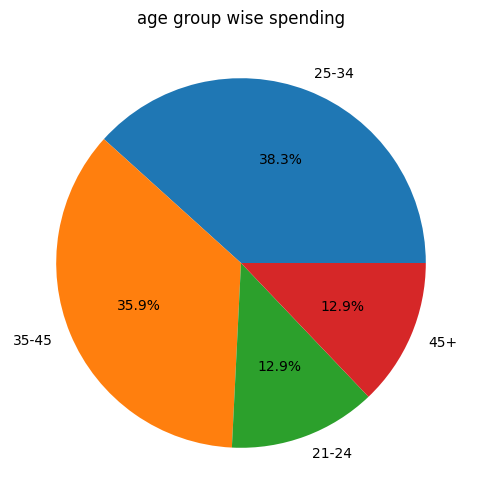

In [17]:
plt.pie(result_5.values,labels=result_5.index,autopct='%1.1f%%')
plt.title("age group wise spending")
plt.show()

### Which city has the highest average spending

In [18]:

result_6= df.groupby("city")["spend"].mean().sort_values(ascending=False)
result_6

city
Mumbai       738.844581
Delhi NCR    693.508307
Bengaluru    616.573143
Hyderabad    527.138959
Chennai      443.375905
Name: spend, dtype: float64

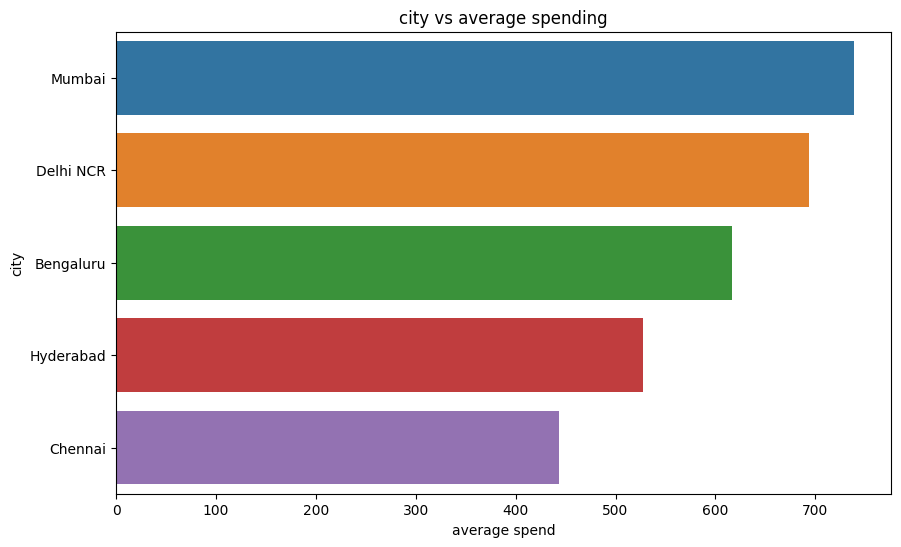

In [19]:
sns.barplot(x=result_6.values,y=result_6.index)
plt.xlabel("average spend")
plt.ylabel("city")
plt.title("city vs average spending")
plt.show()

### City on the basis of income utilization percentage

In [20]:

city_income=df1.groupby("city")["avg_income"].sum()
city_spending=df.groupby("city")["spend"].sum()

city_income = city_income.reset_index()
city_spending = city_spending.reset_index()

merged_df = pd.merge(city_income, city_spending, on='city', how='inner')
merged_df["income utilization"]=merged_df["spend"]*100/merged_df["avg_income"]
merged_df=merged_df.sort_values(by='income utilization',ascending=False)

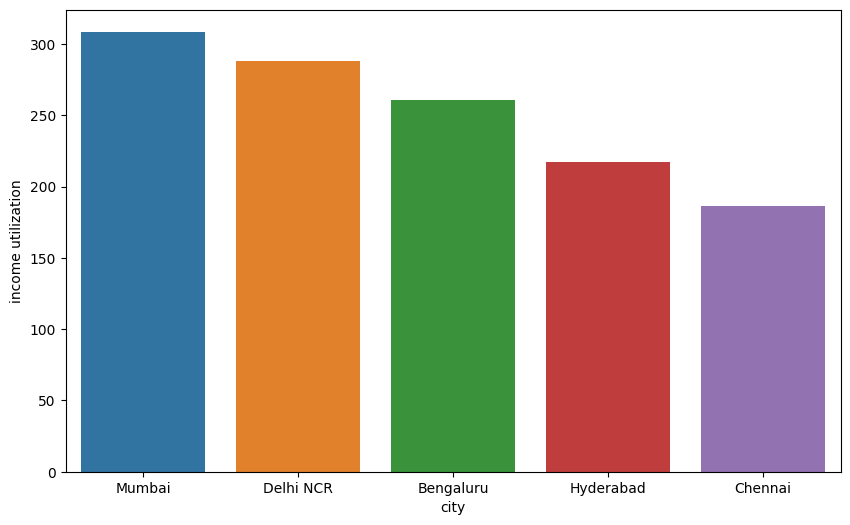

In [21]:
sns.barplot(x=merged_df["city"],y=merged_df["income utilization"])
plt.show()

### Occupation on the basis of income utilization percentage

In [22]:


occupation_income=df1.groupby("occupation")["avg_income"].sum()
occupation_spending=df.groupby("occupation")["spend"].sum()

occupation_income=occupation_income.reset_index()
occupation_spending=occupation_spending.reset_index()

merged_df=pd.merge(occupation_income,occupation_spending,on="occupation",how="inner")
merged_df["income utilization"]=merged_df["spend"]*100/merged_df["avg_income"]
merged_df


,occupation,avg_income,spend,income utilization
0,Business Owners,44157443,88004709,199.297566
1,Freelancers,27485671,75538638,274.829157
2,Government Employees,20761899,36122418,173.984172
3,Salaried IT Employees,79580577,243720304,306.256015
4,Salaried Other Employees,34642539,87511686,252.613372


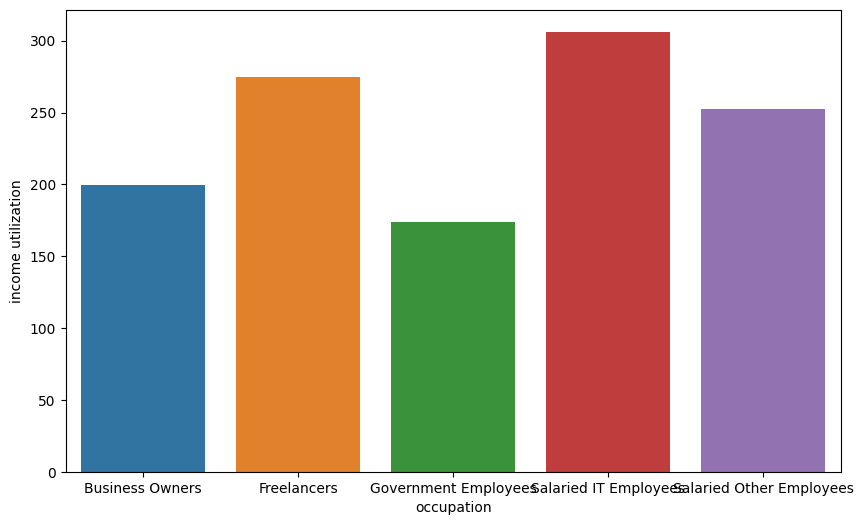

In [23]:
sns.barplot(x=merged_df["occupation"],y=merged_df["income utilization"])
plt.show()

# Inferences

* On an average married males spend higher than others.
* Salaried IT employees spend most of their income and government employees spend least of their income.
* Bills,groceries and electronics contribute approx 51% of the total spending.
* People between 25 to 35 years spends most as compared to other age groups.
* People living in Mumbai spends more as compared to other cities.
* Mumbai has highest income utilization percentage.abs
* Salaried IT employees has the highest income utilization percentage.
   